# Simple feed-forward neural network classification of diabetes data with Keras and Tensorflow

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load PIMA indians diabetes dataset
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.shape

(768, 9)

In [4]:
diabetes.head()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.tail()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
diabetes.min()

1. Number of times pregnant                                                     0.000
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test     0.000
3. Diastolic blood pressure (mm Hg)                                             0.000
4. Triceps skin fold thickness (mm)                                             0.000
5. 2-Hour serum insulin (mu U/ml)                                               0.000
6. Body mass index (weight in kg/(height in m)^2)                               0.000
7. Diabetes pedigree function                                                   0.078
8. Age (years)                                                                 21.000
9. Class variable (0 or 1)                                                      0.000
dtype: float64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
1. Number of times pregnant                                                    768 non-null int64
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test    768 non-null int64
3. Diastolic blood pressure (mm Hg)                                            768 non-null int64
4. Triceps skin fold thickness (mm)                                            768 non-null int64
5. 2-Hour serum insulin (mu U/ml)                                              768 non-null int64
6. Body mass index (weight in kg/(height in m)^2)                              768 non-null float64
7. Diabetes pedigree function                                                  768 non-null float64
8. Age (years)                                                                 768 non-null int64
9. Class variable (0 or 1)                                                     768 non-null int64
dtypes: fl

In [8]:
diabetes.describe()

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabetes

,1. Number of times pregnant,2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test,3. Diastolic blood pressure (mm Hg),4. Triceps skin fold thickness (mm),5. 2-Hour serum insulin (mu U/ml),6. Body mass index (weight in kg/(height in m)^2),7. Diabetes pedigree function,8. Age (years),9. Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# rename columns to short forms
diabetes.columns = [
    "NumTimesPrg", "PlGlcConc", "BloodP",
    "SkinThick", "TwoHourSerIns", "BMI",
    "DiPedFunc", "Age", "HasDiabetes"]

In [11]:
# get number of values with 0 value
diabetes.isin([0]).sum()

NumTimesPrg      111
PlGlcConc          5
BloodP            35
SkinThick        227
TwoHourSerIns    374
BMI               11
DiPedFunc          0
Age                0
HasDiabetes      500
dtype: int64

In [12]:
# get number of values with missing value
diabetes.isna().sum()

NumTimesPrg      0
PlGlcConc        0
BloodP           0
SkinThick        0
TwoHourSerIns    0
BMI              0
DiPedFunc        0
Age              0
HasDiabetes      0
dtype: int64

In [13]:
# replace 0 values with mean of the whole column
for col in ['PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI']:
    median_val = diabetes[col].mean()
    diabetes[col] = diabetes[col].replace(to_replace=0, value=median_val)

In [14]:
diabetes

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019767AC5D68>,
      dtype=object)

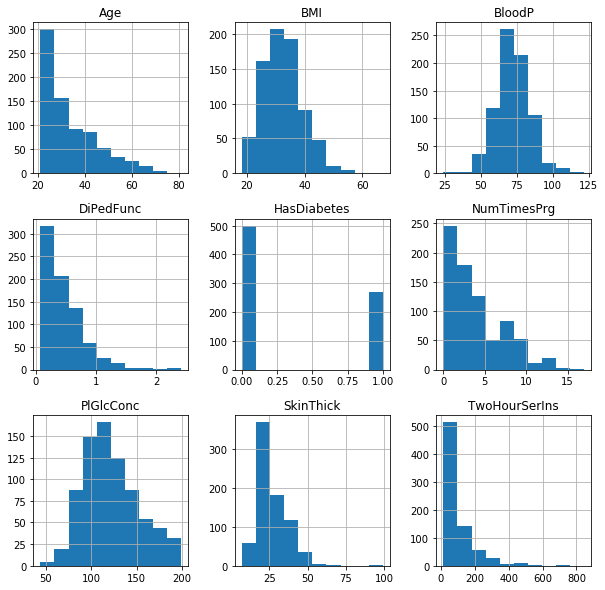

In [18]:
diabetes.hist(bins = 10, figsize = (10,10))

In [19]:
# show correlations
corr = diabetes.corr()
corr

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
PlGlcConc,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodP,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThick,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
TwoHourSerIns,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiPedFunc,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


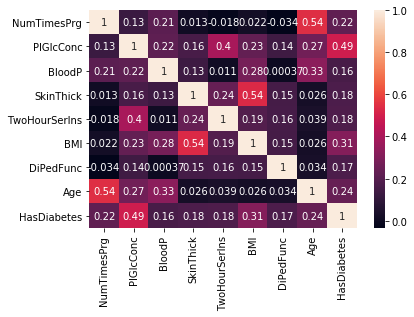

In [20]:
import seaborn as sns
sns.heatmap(corr, annot = True)

In [21]:
# split to train/test datasets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(diabetes, test_size=0.1, random_state=42)

In [22]:
train_set

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
396,3,96.0,56.000000,34.000000,115.000000,24.7,0.944,39,0
528,0,117.0,66.000000,31.000000,188.000000,30.8,0.493,22,0
10,4,110.0,92.000000,20.536458,79.799479,37.6,0.191,30,0
192,7,159.0,66.000000,20.536458,79.799479,30.4,0.383,36,1
448,0,104.0,64.000000,37.000000,64.000000,33.6,0.510,22,1
...,...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.000000,140.000000,28.6,0.411,26,0
106,1,96.0,122.000000,20.536458,79.799479,22.4,0.207,27,0
270,10,101.0,86.000000,37.000000,79.799479,45.6,1.136,38,1
435,0,141.0,69.105469,20.536458,79.799479,42.4,0.205,29,1


In [23]:
train_set.shape

(691, 9)

In [24]:
test_set.shape

(77, 9)

In [25]:
# split dataset to inputs/labels
y_train = train_set["HasDiabetes"].copy()
x_train = train_set.drop("HasDiabetes", axis=1)
y_test = test_set["HasDiabetes"].copy()
x_test = test_set.drop("HasDiabetes", axis=1)

In [26]:
# learn scaling from train dataset
from sklearn.preprocessing import MinMaxScaler as Scaler
scaler = Scaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
X_train = scaler.transform(x_train)
Y_train = np.asarray(y_train)
X_test = scaler.transform(x_test)
Y_test = np.asarray(y_test)

In [35]:
# Create NN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# define a sequential model
model = Sequential()

# add hidden - fully connected layer
model.add(Dense(24, input_dim=8))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# add hidden - fully connected layer
model.add(Dense(24))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# add outputlayer
model.add(Dense(1))
model.add(Activation('sigmoid'))

# build model
model.compile(optimizer="adam",
             loss='binary_crossentropy',
             metrics=['binary_accuracy'])

In [36]:
#Plot the NN if Graphiz lib is available only
#from keras.utils import plot_model
#plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [37]:
epochs = 1500

# try at least 1000 epochs
hist = model.fit(
          X_train,
          Y_train,
          epochs=epochs,
          verbose=1,
          batch_size=32,
          shuffle=True,
          validation_data=(X_test,Y_test)
)

Train on 691 samples, validate on 77 samples
Epoch 1/1500
691/691 [==============================] - 1s 2ms/sample - loss: 0.6832 - binary_accuracy: 0.6512 - val_loss: 0.6724 - val_binary_accuracy: 0.6494
Epoch 2/1500
691/691 [==============================] - 0s 144us/sample - loss: 0.6763 - binary_accuracy: 0.6541 - val_loss: 0.6688 - val_binary_accuracy: 0.6494
Epoch 3/1500
691/691 [==============================] - 0s 146us/sample - loss: 0.6753 - binary_accuracy: 0.6512 - val_loss: 0.6642 - val_binary_accuracy: 0.6494
Epoch 4/1500
691/691 [==============================] - 0s 150us/sample - loss: 0.6653 - binary_accuracy: 0.6498 - val_loss: 0.6606 - val_binary_accuracy: 0.6494
Epoch 5/1500
691/691 [==============================] - 0s 129us/sample - loss: 0.6575 - binary_accuracy: 0.6541 - val_loss: 0.6570 - val_binary_accuracy: 0.6494
Epoch 6/1500
691/691 [==============================] - 0s 146us/sample - loss: 0.6515 - binary_accuracy: 0.6527 - val_loss: 0.6526 - val_binary_ac

Epoch 51/1500
691/691 [==============================] - 0s 143us/sample - loss: 0.4590 - binary_accuracy: 0.7757 - val_loss: 0.5083 - val_binary_accuracy: 0.7403
Epoch 52/1500
691/691 [==============================] - 0s 190us/sample - loss: 0.4549 - binary_accuracy: 0.7844 - val_loss: 0.5114 - val_binary_accuracy: 0.7143
Epoch 53/1500
691/691 [==============================] - 0s 185us/sample - loss: 0.4698 - binary_accuracy: 0.7728 - val_loss: 0.5118 - val_binary_accuracy: 0.7143
Epoch 54/1500
691/691 [==============================] - 0s 182us/sample - loss: 0.4652 - binary_accuracy: 0.7685 - val_loss: 0.5053 - val_binary_accuracy: 0.7273
Epoch 55/1500
691/691 [==============================] - 0s 136us/sample - loss: 0.4782 - binary_accuracy: 0.7641 - val_loss: 0.5047 - val_binary_accuracy: 0.7403
Epoch 56/1500
691/691 [==============================] - 0s 182us/sample - loss: 0.4616 - binary_accuracy: 0.7858 - val_loss: 0.5072 - val_binary_accuracy: 0.7013
Epoch 57/1500
691/691 

691/691 [==============================] - 0s 192us/sample - loss: 0.4514 - binary_accuracy: 0.7800 - val_loss: 0.5003 - val_binary_accuracy: 0.7403
Epoch 102/1500
691/691 [==============================] - 0s 165us/sample - loss: 0.4430 - binary_accuracy: 0.7685 - val_loss: 0.5034 - val_binary_accuracy: 0.7143
Epoch 103/1500
691/691 [==============================] - 0s 177us/sample - loss: 0.4437 - binary_accuracy: 0.7815 - val_loss: 0.5008 - val_binary_accuracy: 0.7403
Epoch 104/1500
691/691 [==============================] - 0s 161us/sample - loss: 0.4448 - binary_accuracy: 0.7757 - val_loss: 0.5045 - val_binary_accuracy: 0.7403
Epoch 105/1500
691/691 [==============================] - 0s 168us/sample - loss: 0.4393 - binary_accuracy: 0.7844 - val_loss: 0.5029 - val_binary_accuracy: 0.7273
Epoch 106/1500
691/691 [==============================] - 0s 156us/sample - loss: 0.4328 - binary_accuracy: 0.7902 - val_loss: 0.5069 - val_binary_accuracy: 0.7143
Epoch 107/1500
691/691 [=======

691/691 [==============================] - 0s 165us/sample - loss: 0.4400 - binary_accuracy: 0.7974 - val_loss: 0.5069 - val_binary_accuracy: 0.7403
Epoch 152/1500
691/691 [==============================] - 0s 175us/sample - loss: 0.4266 - binary_accuracy: 0.7974 - val_loss: 0.5065 - val_binary_accuracy: 0.7273
Epoch 153/1500
691/691 [==============================] - 0s 164us/sample - loss: 0.4278 - binary_accuracy: 0.7959 - val_loss: 0.5055 - val_binary_accuracy: 0.7273
Epoch 154/1500
691/691 [==============================] - 0s 148us/sample - loss: 0.4379 - binary_accuracy: 0.7902 - val_loss: 0.5072 - val_binary_accuracy: 0.7403
Epoch 155/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.4325 - binary_accuracy: 0.7786 - val_loss: 0.5040 - val_binary_accuracy: 0.7532
Epoch 156/1500
691/691 [==============================] - 0s 166us/sample - loss: 0.4496 - binary_accuracy: 0.7873 - val_loss: 0.5024 - val_binary_accuracy: 0.7273
Epoch 157/1500
691/691 [=======

691/691 [==============================] - 0s 154us/sample - loss: 0.4266 - binary_accuracy: 0.7815 - val_loss: 0.4956 - val_binary_accuracy: 0.7273
Epoch 202/1500
691/691 [==============================] - 0s 145us/sample - loss: 0.4354 - binary_accuracy: 0.7742 - val_loss: 0.4998 - val_binary_accuracy: 0.7403
Epoch 203/1500
691/691 [==============================] - 0s 162us/sample - loss: 0.4344 - binary_accuracy: 0.7800 - val_loss: 0.5003 - val_binary_accuracy: 0.7532
Epoch 204/1500
691/691 [==============================] - 0s 161us/sample - loss: 0.4284 - binary_accuracy: 0.7988 - val_loss: 0.4935 - val_binary_accuracy: 0.7532
Epoch 205/1500
691/691 [==============================] - 0s 158us/sample - loss: 0.4316 - binary_accuracy: 0.8090 - val_loss: 0.4902 - val_binary_accuracy: 0.7403
Epoch 206/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.4293 - binary_accuracy: 0.7887 - val_loss: 0.4913 - val_binary_accuracy: 0.7403
Epoch 207/1500
691/691 [=======

691/691 [==============================] - 0s 171us/sample - loss: 0.4305 - binary_accuracy: 0.7959 - val_loss: 0.4981 - val_binary_accuracy: 0.7403
Epoch 252/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.4301 - binary_accuracy: 0.8032 - val_loss: 0.4949 - val_binary_accuracy: 0.7403
Epoch 253/1500
691/691 [==============================] - 0s 178us/sample - loss: 0.3988 - binary_accuracy: 0.8075 - val_loss: 0.5036 - val_binary_accuracy: 0.7273
Epoch 254/1500
691/691 [==============================] - 0s 180us/sample - loss: 0.4299 - binary_accuracy: 0.8061 - val_loss: 0.5057 - val_binary_accuracy: 0.7143
Epoch 255/1500
691/691 [==============================] - 0s 197us/sample - loss: 0.4269 - binary_accuracy: 0.7916 - val_loss: 0.4984 - val_binary_accuracy: 0.7403
Epoch 256/1500
691/691 [==============================] - 0s 169us/sample - loss: 0.4218 - binary_accuracy: 0.7887 - val_loss: 0.5016 - val_binary_accuracy: 0.7273
Epoch 257/1500
691/691 [=======

Epoch 301/1500
691/691 [==============================] - 0s 156us/sample - loss: 0.4091 - binary_accuracy: 0.7988 - val_loss: 0.4955 - val_binary_accuracy: 0.7662
Epoch 302/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.4087 - binary_accuracy: 0.8061 - val_loss: 0.5008 - val_binary_accuracy: 0.7403
Epoch 303/1500
691/691 [==============================] - 0s 144us/sample - loss: 0.4297 - binary_accuracy: 0.7902 - val_loss: 0.4982 - val_binary_accuracy: 0.7532
Epoch 304/1500
691/691 [==============================] - 0s 169us/sample - loss: 0.4095 - binary_accuracy: 0.7974 - val_loss: 0.5053 - val_binary_accuracy: 0.7273
Epoch 305/1500
691/691 [==============================] - 0s 167us/sample - loss: 0.4118 - binary_accuracy: 0.8017 - val_loss: 0.4946 - val_binary_accuracy: 0.7662
Epoch 306/1500
691/691 [==============================] - 0s 173us/sample - loss: 0.4219 - binary_accuracy: 0.7931 - val_loss: 0.5031 - val_binary_accuracy: 0.7403
Epoch 307/1500
6

691/691 [==============================] - 0s 133us/sample - loss: 0.4006 - binary_accuracy: 0.8148 - val_loss: 0.5090 - val_binary_accuracy: 0.6883
Epoch 351/1500
691/691 [==============================] - 0s 169us/sample - loss: 0.4220 - binary_accuracy: 0.7931 - val_loss: 0.5102 - val_binary_accuracy: 0.7013
Epoch 352/1500
691/691 [==============================] - 0s 163us/sample - loss: 0.4151 - binary_accuracy: 0.8046 - val_loss: 0.5024 - val_binary_accuracy: 0.7273
Epoch 353/1500
691/691 [==============================] - 0s 168us/sample - loss: 0.4106 - binary_accuracy: 0.7988 - val_loss: 0.4959 - val_binary_accuracy: 0.7532
Epoch 354/1500
691/691 [==============================] - 0s 165us/sample - loss: 0.4078 - binary_accuracy: 0.8032 - val_loss: 0.5047 - val_binary_accuracy: 0.7403
Epoch 355/1500
691/691 [==============================] - 0s 190us/sample - loss: 0.4065 - binary_accuracy: 0.7959 - val_loss: 0.5106 - val_binary_accuracy: 0.7143
Epoch 356/1500
691/691 [=======

691/691 [==============================] - 0s 186us/sample - loss: 0.4098 - binary_accuracy: 0.7887 - val_loss: 0.5235 - val_binary_accuracy: 0.7013
Epoch 401/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.4121 - binary_accuracy: 0.8046 - val_loss: 0.5184 - val_binary_accuracy: 0.7013
Epoch 402/1500
691/691 [==============================] - 0s 193us/sample - loss: 0.4053 - binary_accuracy: 0.8090 - val_loss: 0.5284 - val_binary_accuracy: 0.6883
Epoch 403/1500
691/691 [==============================] - 0s 185us/sample - loss: 0.3908 - binary_accuracy: 0.8104 - val_loss: 0.5276 - val_binary_accuracy: 0.7273
Epoch 404/1500
691/691 [==============================] - 0s 180us/sample - loss: 0.4235 - binary_accuracy: 0.8003 - val_loss: 0.5249 - val_binary_accuracy: 0.7013
Epoch 405/1500
691/691 [==============================] - 0s 153us/sample - loss: 0.3971 - binary_accuracy: 0.8162 - val_loss: 0.5216 - val_binary_accuracy: 0.7143
Epoch 406/1500
691/691 [=======

691/691 [==============================] - 0s 139us/sample - loss: 0.3971 - binary_accuracy: 0.8148 - val_loss: 0.5199 - val_binary_accuracy: 0.7143
Epoch 451/1500
691/691 [==============================] - 0s 147us/sample - loss: 0.4028 - binary_accuracy: 0.8148 - val_loss: 0.5266 - val_binary_accuracy: 0.7143
Epoch 452/1500
691/691 [==============================] - 0s 119us/sample - loss: 0.4007 - binary_accuracy: 0.8032 - val_loss: 0.5298 - val_binary_accuracy: 0.6753
Epoch 453/1500
691/691 [==============================] - 0s 98us/sample - loss: 0.4129 - binary_accuracy: 0.8017 - val_loss: 0.5261 - val_binary_accuracy: 0.7013
Epoch 454/1500
691/691 [==============================] - 0s 189us/sample - loss: 0.4053 - binary_accuracy: 0.8061 - val_loss: 0.5131 - val_binary_accuracy: 0.7532
Epoch 455/1500
691/691 [==============================] - 0s 177us/sample - loss: 0.3953 - binary_accuracy: 0.8090 - val_loss: 0.5266 - val_binary_accuracy: 0.7273
Epoch 456/1500
691/691 [========

691/691 [==============================] - 0s 160us/sample - loss: 0.4130 - binary_accuracy: 0.7959 - val_loss: 0.5296 - val_binary_accuracy: 0.7143
Epoch 501/1500
691/691 [==============================] - 0s 138us/sample - loss: 0.4034 - binary_accuracy: 0.8046 - val_loss: 0.5273 - val_binary_accuracy: 0.7143
Epoch 502/1500
691/691 [==============================] - 0s 145us/sample - loss: 0.4013 - binary_accuracy: 0.8090 - val_loss: 0.5295 - val_binary_accuracy: 0.7143
Epoch 503/1500
691/691 [==============================] - 0s 155us/sample - loss: 0.3956 - binary_accuracy: 0.8249 - val_loss: 0.5319 - val_binary_accuracy: 0.7403
Epoch 504/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.4079 - binary_accuracy: 0.7844 - val_loss: 0.5418 - val_binary_accuracy: 0.7143
Epoch 505/1500
691/691 [==============================] - 0s 168us/sample - loss: 0.3941 - binary_accuracy: 0.8119 - val_loss: 0.5291 - val_binary_accuracy: 0.7403
Epoch 506/1500
691/691 [=======

691/691 [==============================] - 0s 156us/sample - loss: 0.3936 - binary_accuracy: 0.8090 - val_loss: 0.5335 - val_binary_accuracy: 0.7403
Epoch 550/1500
691/691 [==============================] - 0s 151us/sample - loss: 0.4040 - binary_accuracy: 0.8032 - val_loss: 0.5372 - val_binary_accuracy: 0.7273
Epoch 551/1500
691/691 [==============================] - 0s 155us/sample - loss: 0.3966 - binary_accuracy: 0.8177 - val_loss: 0.5282 - val_binary_accuracy: 0.7532
Epoch 552/1500
691/691 [==============================] - 0s 172us/sample - loss: 0.3861 - binary_accuracy: 0.8162 - val_loss: 0.5343 - val_binary_accuracy: 0.7532
Epoch 553/1500
691/691 [==============================] - 0s 166us/sample - loss: 0.3977 - binary_accuracy: 0.8119 - val_loss: 0.5302 - val_binary_accuracy: 0.7532
Epoch 554/1500
691/691 [==============================] - 0s 181us/sample - loss: 0.3854 - binary_accuracy: 0.8177 - val_loss: 0.5384 - val_binary_accuracy: 0.7403
Epoch 555/1500
691/691 [=======

Epoch 599/1500
691/691 [==============================] - 0s 146us/sample - loss: 0.3797 - binary_accuracy: 0.8278 - val_loss: 0.5373 - val_binary_accuracy: 0.7532
Epoch 600/1500
691/691 [==============================] - 0s 173us/sample - loss: 0.3939 - binary_accuracy: 0.8191 - val_loss: 0.5459 - val_binary_accuracy: 0.7403
Epoch 601/1500
691/691 [==============================] - 0s 181us/sample - loss: 0.3736 - binary_accuracy: 0.8292 - val_loss: 0.5508 - val_binary_accuracy: 0.7532
Epoch 602/1500
691/691 [==============================] - 0s 131us/sample - loss: 0.3993 - binary_accuracy: 0.8061 - val_loss: 0.5456 - val_binary_accuracy: 0.7403
Epoch 603/1500
691/691 [==============================] - 0s 162us/sample - loss: 0.3925 - binary_accuracy: 0.8032 - val_loss: 0.5395 - val_binary_accuracy: 0.7403
Epoch 604/1500
691/691 [==============================] - 0s 194us/sample - loss: 0.3927 - binary_accuracy: 0.8162 - val_loss: 0.5374 - val_binary_accuracy: 0.7403
Epoch 605/1500
6

Epoch 649/1500
691/691 [==============================] - 0s 168us/sample - loss: 0.3843 - binary_accuracy: 0.8220 - val_loss: 0.5413 - val_binary_accuracy: 0.7273
Epoch 650/1500
691/691 [==============================] - 0s 117us/sample - loss: 0.3946 - binary_accuracy: 0.8090 - val_loss: 0.5421 - val_binary_accuracy: 0.7403
Epoch 651/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.4060 - binary_accuracy: 0.8061 - val_loss: 0.5395 - val_binary_accuracy: 0.7403
Epoch 652/1500
691/691 [==============================] - 0s 165us/sample - loss: 0.3821 - binary_accuracy: 0.8148 - val_loss: 0.5416 - val_binary_accuracy: 0.7403
Epoch 653/1500
691/691 [==============================] - 0s 146us/sample - loss: 0.3824 - binary_accuracy: 0.8220 - val_loss: 0.5516 - val_binary_accuracy: 0.7403
Epoch 654/1500
691/691 [==============================] - 0s 174us/sample - loss: 0.4063 - binary_accuracy: 0.8061 - val_loss: 0.5448 - val_binary_accuracy: 0.7403
Epoch 655/1500
6

Epoch 699/1500
691/691 [==============================] - 0s 156us/sample - loss: 0.3863 - binary_accuracy: 0.8307 - val_loss: 0.5487 - val_binary_accuracy: 0.7532
Epoch 700/1500
691/691 [==============================] - 0s 132us/sample - loss: 0.3919 - binary_accuracy: 0.8220 - val_loss: 0.5413 - val_binary_accuracy: 0.7403
Epoch 701/1500
691/691 [==============================] - 0s 172us/sample - loss: 0.3834 - binary_accuracy: 0.8249 - val_loss: 0.5435 - val_binary_accuracy: 0.7532
Epoch 702/1500
691/691 [==============================] - 0s 105us/sample - loss: 0.3783 - binary_accuracy: 0.8205 - val_loss: 0.5472 - val_binary_accuracy: 0.7532
Epoch 703/1500
691/691 [==============================] - 0s 122us/sample - loss: 0.3966 - binary_accuracy: 0.7988 - val_loss: 0.5484 - val_binary_accuracy: 0.7532
Epoch 704/1500
691/691 [==============================] - 0s 160us/sample - loss: 0.3953 - binary_accuracy: 0.8104 - val_loss: 0.5504 - val_binary_accuracy: 0.7532
Epoch 705/1500
6

Epoch 749/1500
691/691 [==============================] - 0s 166us/sample - loss: 0.3801 - binary_accuracy: 0.8191 - val_loss: 0.5472 - val_binary_accuracy: 0.7532
Epoch 750/1500
691/691 [==============================] - 0s 163us/sample - loss: 0.3904 - binary_accuracy: 0.8133 - val_loss: 0.5467 - val_binary_accuracy: 0.7403
Epoch 751/1500
691/691 [==============================] - 0s 165us/sample - loss: 0.3863 - binary_accuracy: 0.8234 - val_loss: 0.5446 - val_binary_accuracy: 0.7532
Epoch 752/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.3939 - binary_accuracy: 0.8234 - val_loss: 0.5510 - val_binary_accuracy: 0.7532
Epoch 753/1500
691/691 [==============================] - 0s 186us/sample - loss: 0.3816 - binary_accuracy: 0.8148 - val_loss: 0.5503 - val_binary_accuracy: 0.7532
Epoch 754/1500
691/691 [==============================] - 0s 183us/sample - loss: 0.3783 - binary_accuracy: 0.8249 - val_loss: 0.5547 - val_binary_accuracy: 0.7532
Epoch 755/1500
6

Epoch 799/1500
691/691 [==============================] - 0s 145us/sample - loss: 0.3785 - binary_accuracy: 0.8205 - val_loss: 0.5528 - val_binary_accuracy: 0.7532
Epoch 800/1500
691/691 [==============================] - 0s 167us/sample - loss: 0.3895 - binary_accuracy: 0.8292 - val_loss: 0.5554 - val_binary_accuracy: 0.7532
Epoch 801/1500
691/691 [==============================] - 0s 158us/sample - loss: 0.3871 - binary_accuracy: 0.8263 - val_loss: 0.5509 - val_binary_accuracy: 0.7403
Epoch 802/1500
691/691 [==============================] - 0s 159us/sample - loss: 0.3662 - binary_accuracy: 0.8350 - val_loss: 0.5570 - val_binary_accuracy: 0.7403
Epoch 803/1500
691/691 [==============================] - 0s 164us/sample - loss: 0.3840 - binary_accuracy: 0.8394 - val_loss: 0.5567 - val_binary_accuracy: 0.7532
Epoch 804/1500
691/691 [==============================] - 0s 183us/sample - loss: 0.3799 - binary_accuracy: 0.8177 - val_loss: 0.5509 - val_binary_accuracy: 0.7532
Epoch 805/1500
6

Epoch 849/1500
691/691 [==============================] - 0s 127us/sample - loss: 0.3801 - binary_accuracy: 0.8394 - val_loss: 0.5635 - val_binary_accuracy: 0.7403
Epoch 850/1500
691/691 [==============================] - 0s 155us/sample - loss: 0.3749 - binary_accuracy: 0.8379 - val_loss: 0.5560 - val_binary_accuracy: 0.7403
Epoch 851/1500
691/691 [==============================] - 0s 124us/sample - loss: 0.3865 - binary_accuracy: 0.8191 - val_loss: 0.5532 - val_binary_accuracy: 0.7403
Epoch 852/1500
691/691 [==============================] - 0s 154us/sample - loss: 0.3853 - binary_accuracy: 0.8148 - val_loss: 0.5523 - val_binary_accuracy: 0.7403
Epoch 853/1500
691/691 [==============================] - 0s 159us/sample - loss: 0.3796 - binary_accuracy: 0.8423 - val_loss: 0.5597 - val_binary_accuracy: 0.7403
Epoch 854/1500
691/691 [==============================] - 0s 161us/sample - loss: 0.3752 - binary_accuracy: 0.8263 - val_loss: 0.5557 - val_binary_accuracy: 0.7532
Epoch 855/1500
6

Epoch 899/1500
691/691 [==============================] - 0s 137us/sample - loss: 0.3838 - binary_accuracy: 0.8336 - val_loss: 0.5519 - val_binary_accuracy: 0.7403
Epoch 900/1500
691/691 [==============================] - 0s 147us/sample - loss: 0.3633 - binary_accuracy: 0.8350 - val_loss: 0.5617 - val_binary_accuracy: 0.7403
Epoch 901/1500
691/691 [==============================] - 0s 187us/sample - loss: 0.3851 - binary_accuracy: 0.8162 - val_loss: 0.5536 - val_binary_accuracy: 0.7532
Epoch 902/1500
691/691 [==============================] - 0s 160us/sample - loss: 0.3750 - binary_accuracy: 0.8321 - val_loss: 0.5546 - val_binary_accuracy: 0.7403
Epoch 903/1500
691/691 [==============================] - 0s 133us/sample - loss: 0.3766 - binary_accuracy: 0.8307 - val_loss: 0.5544 - val_binary_accuracy: 0.7532
Epoch 904/1500
691/691 [==============================] - 0s 148us/sample - loss: 0.3847 - binary_accuracy: 0.8234 - val_loss: 0.5534 - val_binary_accuracy: 0.7532
Epoch 905/1500
6

Epoch 949/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.3779 - binary_accuracy: 0.8177 - val_loss: 0.5618 - val_binary_accuracy: 0.7532
Epoch 950/1500
691/691 [==============================] - 0s 207us/sample - loss: 0.3716 - binary_accuracy: 0.8177 - val_loss: 0.5579 - val_binary_accuracy: 0.7532
Epoch 951/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.3782 - binary_accuracy: 0.8365 - val_loss: 0.5590 - val_binary_accuracy: 0.7532
Epoch 952/1500
691/691 [==============================] - 0s 158us/sample - loss: 0.3715 - binary_accuracy: 0.8220 - val_loss: 0.5624 - val_binary_accuracy: 0.7532
Epoch 953/1500
691/691 [==============================] - 0s 133us/sample - loss: 0.3833 - binary_accuracy: 0.8148 - val_loss: 0.5639 - val_binary_accuracy: 0.7532
Epoch 954/1500
691/691 [==============================] - 0s 122us/sample - loss: 0.3846 - binary_accuracy: 0.8162 - val_loss: 0.5613 - val_binary_accuracy: 0.7532
Epoch 955/1500
6

Epoch 999/1500
691/691 [==============================] - 0s 172us/sample - loss: 0.3804 - binary_accuracy: 0.8321 - val_loss: 0.5637 - val_binary_accuracy: 0.7532
Epoch 1000/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.3671 - binary_accuracy: 0.8249 - val_loss: 0.5711 - val_binary_accuracy: 0.7403
Epoch 1001/1500
691/691 [==============================] - 0s 167us/sample - loss: 0.3777 - binary_accuracy: 0.8220 - val_loss: 0.5675 - val_binary_accuracy: 0.7532
Epoch 1002/1500
691/691 [==============================] - 0s 162us/sample - loss: 0.3883 - binary_accuracy: 0.8191 - val_loss: 0.5580 - val_binary_accuracy: 0.7532
Epoch 1003/1500
691/691 [==============================] - 0s 162us/sample - loss: 0.3711 - binary_accuracy: 0.8336 - val_loss: 0.5642 - val_binary_accuracy: 0.7532
Epoch 1004/1500
691/691 [==============================] - 0s 149us/sample - loss: 0.3865 - binary_accuracy: 0.8177 - val_loss: 0.5621 - val_binary_accuracy: 0.7532
Epoch 1005/

Epoch 1049/1500
691/691 [==============================] - 0s 167us/sample - loss: 0.3860 - binary_accuracy: 0.8234 - val_loss: 0.5606 - val_binary_accuracy: 0.7532
Epoch 1050/1500
691/691 [==============================] - 0s 161us/sample - loss: 0.3843 - binary_accuracy: 0.8205 - val_loss: 0.5622 - val_binary_accuracy: 0.7532
Epoch 1051/1500
691/691 [==============================] - 0s 155us/sample - loss: 0.3734 - binary_accuracy: 0.8336 - val_loss: 0.5687 - val_binary_accuracy: 0.7532
Epoch 1052/1500
691/691 [==============================] - 0s 158us/sample - loss: 0.3591 - binary_accuracy: 0.8423 - val_loss: 0.5716 - val_binary_accuracy: 0.7403
Epoch 1053/1500
691/691 [==============================] - 0s 172us/sample - loss: 0.3697 - binary_accuracy: 0.8350 - val_loss: 0.5809 - val_binary_accuracy: 0.7532
Epoch 1054/1500
691/691 [==============================] - 0s 140us/sample - loss: 0.3828 - binary_accuracy: 0.8205 - val_loss: 0.5741 - val_binary_accuracy: 0.7532
Epoch 1055

691/691 [==============================] - 0s 153us/sample - loss: 0.3706 - binary_accuracy: 0.8205 - val_loss: 0.5764 - val_binary_accuracy: 0.7532
Epoch 1099/1500
691/691 [==============================] - 0s 139us/sample - loss: 0.3715 - binary_accuracy: 0.8278 - val_loss: 0.5778 - val_binary_accuracy: 0.7532
Epoch 1100/1500
691/691 [==============================] - 0s 162us/sample - loss: 0.3856 - binary_accuracy: 0.8234 - val_loss: 0.5724 - val_binary_accuracy: 0.7532
Epoch 1101/1500
691/691 [==============================] - 0s 141us/sample - loss: 0.3729 - binary_accuracy: 0.8437 - val_loss: 0.5753 - val_binary_accuracy: 0.7532
Epoch 1102/1500
691/691 [==============================] - 0s 154us/sample - loss: 0.3758 - binary_accuracy: 0.8394 - val_loss: 0.5692 - val_binary_accuracy: 0.7662
Epoch 1103/1500
691/691 [==============================] - 0s 166us/sample - loss: 0.3797 - binary_accuracy: 0.8278 - val_loss: 0.5661 - val_binary_accuracy: 0.7532
Epoch 1104/1500
691/691 [=

691/691 [==============================] - 0s 118us/sample - loss: 0.3734 - binary_accuracy: 0.8205 - val_loss: 0.5745 - val_binary_accuracy: 0.7662
Epoch 1148/1500
691/691 [==============================] - 0s 149us/sample - loss: 0.3697 - binary_accuracy: 0.8336 - val_loss: 0.5760 - val_binary_accuracy: 0.7662
Epoch 1149/1500
691/691 [==============================] - 0s 149us/sample - loss: 0.3660 - binary_accuracy: 0.8292 - val_loss: 0.5787 - val_binary_accuracy: 0.7662
Epoch 1150/1500
691/691 [==============================] - 0s 170us/sample - loss: 0.3724 - binary_accuracy: 0.8234 - val_loss: 0.5749 - val_binary_accuracy: 0.7662
Epoch 1151/1500
691/691 [==============================] - 0s 123us/sample - loss: 0.3813 - binary_accuracy: 0.8220 - val_loss: 0.5797 - val_binary_accuracy: 0.7662
Epoch 1152/1500
691/691 [==============================] - 0s 195us/sample - loss: 0.3694 - binary_accuracy: 0.8220 - val_loss: 0.5708 - val_binary_accuracy: 0.7662
Epoch 1153/1500
691/691 [=

Epoch 1197/1500
691/691 [==============================] - 0s 242us/sample - loss: 0.3737 - binary_accuracy: 0.8336 - val_loss: 0.5821 - val_binary_accuracy: 0.7532
Epoch 1198/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.3731 - binary_accuracy: 0.8249 - val_loss: 0.5786 - val_binary_accuracy: 0.7532
Epoch 1199/1500
691/691 [==============================] - 0s 119us/sample - loss: 0.3628 - binary_accuracy: 0.8278 - val_loss: 0.5782 - val_binary_accuracy: 0.7532
Epoch 1200/1500
691/691 [==============================] - 0s 148us/sample - loss: 0.3746 - binary_accuracy: 0.8263 - val_loss: 0.5790 - val_binary_accuracy: 0.7532
Epoch 1201/1500
691/691 [==============================] - 0s 143us/sample - loss: 0.3624 - binary_accuracy: 0.8350 - val_loss: 0.5870 - val_binary_accuracy: 0.7662
Epoch 1202/1500
691/691 [==============================] - 0s 146us/sample - loss: 0.3747 - binary_accuracy: 0.8452 - val_loss: 0.5875 - val_binary_accuracy: 0.7662
Epoch 1203

Epoch 1247/1500
691/691 [==============================] - 0s 186us/sample - loss: 0.3626 - binary_accuracy: 0.8365 - val_loss: 0.5958 - val_binary_accuracy: 0.7403
Epoch 1248/1500
691/691 [==============================] - 0s 147us/sample - loss: 0.3738 - binary_accuracy: 0.8278 - val_loss: 0.5867 - val_binary_accuracy: 0.7532
Epoch 1249/1500
691/691 [==============================] - 0s 144us/sample - loss: 0.3841 - binary_accuracy: 0.8148 - val_loss: 0.5866 - val_binary_accuracy: 0.7662
Epoch 1250/1500
691/691 [==============================] - 0s 171us/sample - loss: 0.3736 - binary_accuracy: 0.8379 - val_loss: 0.5860 - val_binary_accuracy: 0.7662
Epoch 1251/1500
691/691 [==============================] - 0s 148us/sample - loss: 0.3739 - binary_accuracy: 0.8234 - val_loss: 0.5859 - val_binary_accuracy: 0.7662
Epoch 1252/1500
691/691 [==============================] - 0s 135us/sample - loss: 0.3689 - binary_accuracy: 0.8292 - val_loss: 0.5876 - val_binary_accuracy: 0.7532
Epoch 1253

Epoch 1297/1500
691/691 [==============================] - 0s 133us/sample - loss: 0.3669 - binary_accuracy: 0.8321 - val_loss: 0.5836 - val_binary_accuracy: 0.7532
Epoch 1298/1500
691/691 [==============================] - 0s 159us/sample - loss: 0.3601 - binary_accuracy: 0.8394 - val_loss: 0.5886 - val_binary_accuracy: 0.7662
Epoch 1299/1500
691/691 [==============================] - 0s 149us/sample - loss: 0.3697 - binary_accuracy: 0.8249 - val_loss: 0.5845 - val_binary_accuracy: 0.7662
Epoch 1300/1500
691/691 [==============================] - 0s 165us/sample - loss: 0.3692 - binary_accuracy: 0.8394 - val_loss: 0.5787 - val_binary_accuracy: 0.7792
Epoch 1301/1500
691/691 [==============================] - 0s 156us/sample - loss: 0.3683 - binary_accuracy: 0.8379 - val_loss: 0.5936 - val_binary_accuracy: 0.7662
Epoch 1302/1500
691/691 [==============================] - 0s 195us/sample - loss: 0.3765 - binary_accuracy: 0.8220 - val_loss: 0.5855 - val_binary_accuracy: 0.7662
Epoch 1303

691/691 [==============================] - 0s 131us/sample - loss: 0.3608 - binary_accuracy: 0.8350 - val_loss: 0.5903 - val_binary_accuracy: 0.7662
Epoch 1347/1500
691/691 [==============================] - 0s 169us/sample - loss: 0.3572 - binary_accuracy: 0.8278 - val_loss: 0.5896 - val_binary_accuracy: 0.7662
Epoch 1348/1500
691/691 [==============================] - 0s 174us/sample - loss: 0.3608 - binary_accuracy: 0.8408 - val_loss: 0.5906 - val_binary_accuracy: 0.7662
Epoch 1349/1500
691/691 [==============================] - 0s 175us/sample - loss: 0.3470 - binary_accuracy: 0.8466 - val_loss: 0.5884 - val_binary_accuracy: 0.7662
Epoch 1350/1500
691/691 [==============================] - 0s 229us/sample - loss: 0.3681 - binary_accuracy: 0.8263 - val_loss: 0.5850 - val_binary_accuracy: 0.7662
Epoch 1351/1500
691/691 [==============================] - 0s 152us/sample - loss: 0.3538 - binary_accuracy: 0.8408 - val_loss: 0.5847 - val_binary_accuracy: 0.7792
Epoch 1352/1500
691/691 [=

Epoch 1396/1500
691/691 [==============================] - 0s 132us/sample - loss: 0.3829 - binary_accuracy: 0.8249 - val_loss: 0.5980 - val_binary_accuracy: 0.7403
Epoch 1397/1500
691/691 [==============================] - 0s 171us/sample - loss: 0.3793 - binary_accuracy: 0.8191 - val_loss: 0.5936 - val_binary_accuracy: 0.7403
Epoch 1398/1500
691/691 [==============================] - 0s 172us/sample - loss: 0.3604 - binary_accuracy: 0.8350 - val_loss: 0.5964 - val_binary_accuracy: 0.7662
Epoch 1399/1500
691/691 [==============================] - 0s 163us/sample - loss: 0.3754 - binary_accuracy: 0.8249 - val_loss: 0.5933 - val_binary_accuracy: 0.7792
Epoch 1400/1500
691/691 [==============================] - 0s 126us/sample - loss: 0.3403 - binary_accuracy: 0.8365 - val_loss: 0.5936 - val_binary_accuracy: 0.7662
Epoch 1401/1500
691/691 [==============================] - 0s 132us/sample - loss: 0.3516 - binary_accuracy: 0.8394 - val_loss: 0.6024 - val_binary_accuracy: 0.7792
Epoch 1402

Epoch 1446/1500
691/691 [==============================] - 0s 128us/sample - loss: 0.3606 - binary_accuracy: 0.8321 - val_loss: 0.5969 - val_binary_accuracy: 0.7792
Epoch 1447/1500
691/691 [==============================] - 0s 136us/sample - loss: 0.3747 - binary_accuracy: 0.8292 - val_loss: 0.5945 - val_binary_accuracy: 0.7792
Epoch 1448/1500
691/691 [==============================] - 0s 145us/sample - loss: 0.3788 - binary_accuracy: 0.8191 - val_loss: 0.5862 - val_binary_accuracy: 0.7792
Epoch 1449/1500
691/691 [==============================] - 0s 141us/sample - loss: 0.3597 - binary_accuracy: 0.8321 - val_loss: 0.6020 - val_binary_accuracy: 0.7662
Epoch 1450/1500
691/691 [==============================] - 0s 143us/sample - loss: 0.3694 - binary_accuracy: 0.8379 - val_loss: 0.5943 - val_binary_accuracy: 0.7662
Epoch 1451/1500
691/691 [==============================] - 0s 139us/sample - loss: 0.3588 - binary_accuracy: 0.8423 - val_loss: 0.5898 - val_binary_accuracy: 0.7792
Epoch 1452

Epoch 1496/1500
691/691 [==============================] - 0s 146us/sample - loss: 0.3471 - binary_accuracy: 0.8509 - val_loss: 0.6005 - val_binary_accuracy: 0.7662
Epoch 1497/1500
691/691 [==============================] - 0s 168us/sample - loss: 0.3590 - binary_accuracy: 0.8437 - val_loss: 0.6103 - val_binary_accuracy: 0.7532
Epoch 1498/1500
691/691 [==============================] - 0s 124us/sample - loss: 0.3595 - binary_accuracy: 0.8408 - val_loss: 0.6039 - val_binary_accuracy: 0.7662
Epoch 1499/1500
691/691 [==============================] - 0s 142us/sample - loss: 0.3627 - binary_accuracy: 0.8350 - val_loss: 0.6099 - val_binary_accuracy: 0.7532
Epoch 1500/1500
691/691 [==============================] - 0s 156us/sample - loss: 0.3487 - binary_accuracy: 0.8365 - val_loss: 0.6008 - val_binary_accuracy: 0.7662


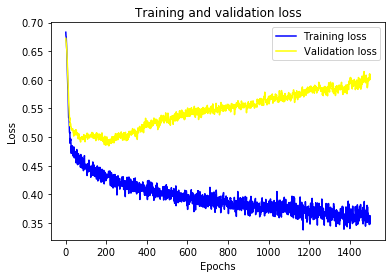

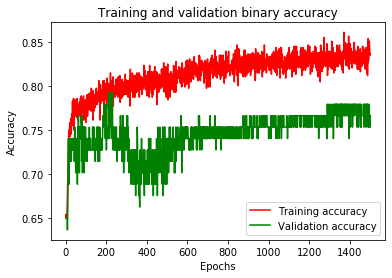

In [38]:
history_dict = hist.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b', label='Training loss', color='blue')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss', color='yellow')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = history_dict['binary_accuracy']
val_accuracy = history_dict['val_binary_accuracy']

plt.plot(epochs, accuracy, 'b', label='Training accuracy', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy', color='green')
plt.title('Training and validation binary accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

59  classified correctly
18  classified incorrectly


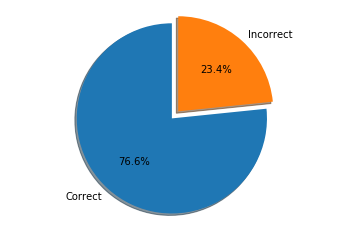

In [39]:
# predictions
predictions = model.predict(X_test)

# see which we predicted correctly and which not
predicted_classes = model.predict_classes(X_test)

n_correct = 0
n_incorrect = 0

for i, predicted_class in enumerate(predicted_classes):
    if predicted_class == Y_test[i]:
        n_correct += 1
    else:
        n_incorrect += 1

print(n_correct," classified correctly")
print(n_incorrect," classified incorrectly")

labels = ['Correct', 'Incorrect']
sizes = [n_correct, n_incorrect]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [40]:
# Make prediction for custom data

# 1. Number of times pregnant (max=17)
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test (max=199)
# 3. Diastolic blood pressure (mm Hg) (max=122)
# 4. Triceps skin fold thickness (mm) (max=99)
# 5. 2-Hour serum insulin (mu U/ml) (max=846)
# 6. Body mass index (weight in kg/(height in m)^2) (max=67)
# 7. Diabetes pedigree function (max=2.42)
# 8. Age (years) (max=81)

pacient_data = pd.DataFrame([[6, 148, 72, 35, 79, 33, 0.627, 50]])

# scale input data
pacient_data_scaled = scaler.transform(pacient_data)
X_pacient = np.asarray(pacient_data_scaled)

predicted = model.predict(X_pacient)
print("predicted: {}% of diabetes 2".format(predicted[0][0] * 100.0))

predict_classes = model.predict_classes(X_pacient)
print("predicted class: ", predict_classes[0][0])

predicted: 65.9220039844513% of diabetes 2
predicted class:  1


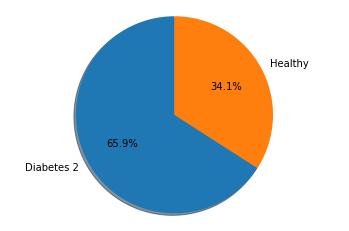

In [42]:
labels = ['Diabetes 2', 'Healthy']
sizes = [predicted[0][0], 1 - predicted[0][0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()